<a href="https://colab.research.google.com/github/Elwing-Chou/hp/blob/main/16_danmu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```python
# import json
# import requests
# url = "https://ani.gamer.com.tw/ajax/danmuGet.php"
# datas = {"sn": "23505"}
# h = {
#     "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"
# }
# response = requests.post(url, datas, headers=h)
# result = json.loads(response.text)
# with open("danmu.txt", "w", encoding="utf-8") as f:
#     json.dump(result, f, ensure_ascii=False, indent=4)
```

In [1]:
import urllib.request as req
url = "https://github.com/Elwing-Chou/hp/raw/main/danmu.txt"
req.urlretrieve(url, "danmu")

('danmu', <http.client.HTTPMessage at 0x7b0f40910430>)

In [ ]:
import pandas as pd
df = pd.read_json("danmu", encoding="utf-8")
df

In [ ]:
df.groupby("userid").head(1)

In [6]:
import urllib.request as req
url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
req.urlretrieve(url, "dict.big")

import jieba
jieba.set_dictionary("dict.big")

In [ ]:
def func(s):
    return " ".join(jieba.cut(s))
text_split = df["text"].apply(func)
text_split

In [ ]:
import jieba.analyse
text_total = "\n".join(text_split)
keywords = jieba.analyse.extract_tags(text_total,
                                      topK=30,
                                      withWeight=True)
keywords

In [29]:
!pip install jieba

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
# !開始都是 linux指令
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '大哥'),
  Text(1, 0, '沒有'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022'),
  Text(4, 0, '10'),
  Text(5, 0, 'QQ'),
  Text(6, 0, '巴哈'),
  Text(7, 0, '什麼'),
  Text(8, 0, '11'),
  Text(9, 0, '12'),
  Text(10, 0, '怎麼'),
  Text(11, 0, '留名'),
  Text(12, 0, '煉獄'),
  Text(13, 0, '...'),
  Text(14, 0, '免費'),
  Text(15, 0, '神作'),
  Text(16, 0, '三哥'),
  Text(17, 0, '可愛'),
  Text(18, 0, '付費'),
  Text(19, 0, '真的'),
  Text(20, 0, 'BGM'),
  Text(21, 0, '火車'),
  Text(22, 0, '這裡'),
  Text(23, 0, '還是'),
  Text(24, 0, '不會'),
  Text(25, 0, '炭治郎'),
  Text(26, 0, '電影院'),
  Text(27, 0, '嗚嗚'),
  Text(28, 0, '應該'),
  Text(29, 0, '豬豬')])

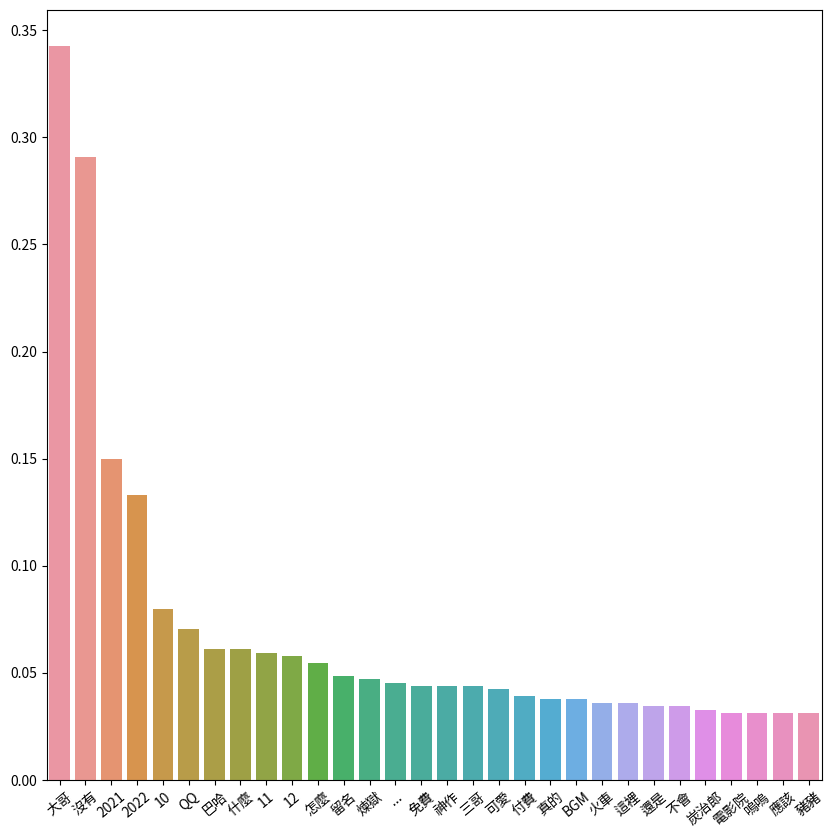

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# xs, ys = [], []
# for k, score in keywords:
#     xs.append(k)
#     ys.append(score)
plt.figure(figsize=(10, 10))
xs = [k for k, score in keywords]
ys = [score for k, score in keywords]
sns.barplot(x=xs, y=ys)
plt.xticks(rotation=40)